In [202]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report

import os
import random

In [203]:
url = 'https://raw.githubusercontent.com/Priyul/711-NN-Classifier/refs/heads/main/Almond.csv'
df = pd.read_csv(url)
#shuffle dataset
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [204]:
#print dataset info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2803 non-null   int64  
 1   Length (major axis)       1946 non-null   float64
 2   Width (minor axis)        1861 non-null   float64
 3   Thickness (depth)         1799 non-null   float64
 4   Area                      2803 non-null   float64
 5   Perimeter                 2803 non-null   float64
 6   Roundness                 1946 non-null   float64
 7   Solidity                  2803 non-null   float64
 8   Compactness               2803 non-null   float64
 9   Aspect Ratio              1004 non-null   float64
 10  Eccentricity              1004 non-null   float64
 11  Extent                    2803 non-null   float64
 12  Convex hull(convex area)  2803 non-null   float64
 13  Type                      2803 non-null   object 
dtypes: float

In [205]:
# function to impute missing values
def impute_missing(row):
    if pd.isnull(row['Length (major axis)']):
        row['Length (major axis)'] = (row['Width (minor axis)'] + row['Thickness (depth)']) / 2
    if pd.isnull(row['Width (minor axis)']):
        row['Width (minor axis)'] = (row['Length (major axis)'] + row['Thickness (depth)']) / 2
    if pd.isnull(row['Thickness (depth)']):
        row['Thickness (depth)'] = (row['Length (major axis)'] + row['Width (minor axis)']) / 2
    return row

df = df.apply(impute_missing, axis=1)

print(df.isnull().sum())

Unnamed: 0                     0
Length (major axis)            0
Width (minor axis)             0
Thickness (depth)              0
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64


In [206]:
# dropping unnecessary columns
df = df.drop(columns=['Aspect Ratio', 'Eccentricity', 'Extent', 'Convex hull(convex area)', 'Compactness','Roundness'])
df = df.drop(df.columns[0], axis=1)
#Final Columns to Keep: Length (major axis), Width (minor axis), Thickness (depth), Area, Perimeter
print(df.head())

   Length (major axis)  Width (minor axis)  Thickness (depth)     Area  \
0           177.849880          227.940628         127.759132  22619.0   
1           181.193817          234.188126         128.199509  23038.0   
2           177.607578          229.418610         125.796547  22386.5   
3           179.340981          232.763153         125.918808  22578.5   
4           168.702095          230.150742         107.253448  19068.0   

    Perimeter  Solidity   Type  
0  643.813269  0.973384  MAMRA  
1  680.984841  0.957304  MAMRA  
2  646.943212  0.967270  MAMRA  
3  661.227483  0.965512  MAMRA  
4  624.842706  0.951450  MAMRA  


In [207]:
print(df.head())

   Length (major axis)  Width (minor axis)  Thickness (depth)     Area  \
0           177.849880          227.940628         127.759132  22619.0   
1           181.193817          234.188126         128.199509  23038.0   
2           177.607578          229.418610         125.796547  22386.5   
3           179.340981          232.763153         125.918808  22578.5   
4           168.702095          230.150742         107.253448  19068.0   

    Perimeter  Solidity   Type  
0  643.813269  0.973384  MAMRA  
1  680.984841  0.957304  MAMRA  
2  646.943212  0.967270  MAMRA  
3  661.227483  0.965512  MAMRA  
4  624.842706  0.951450  MAMRA  


In [208]:
X = df.drop(columns=['Type'])  # features
y = df['Type']  # labels

# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(df_scaled.describe())

       Length (major axis)  Width (minor axis)  Thickness (depth)  \
count         2.803000e+03        2.803000e+03       2.803000e+03   
mean          8.111797e-17       -3.041924e-16      -1.216770e-16   
std           1.000178e+00        1.000178e+00       1.000178e+00   
min          -1.788088e+00       -2.651212e+00      -1.426922e+00   
25%          -9.844108e-01       -7.025806e-01      -7.240043e-01   
50%           6.054373e-02       -8.608574e-02      -4.501550e-01   
75%           6.276900e-01        5.874290e-01       7.727141e-01   
max           3.122680e+00        3.793689e+00       3.223452e+00   

               Area    Perimeter      Solidity  
count  2.803000e+03  2803.000000  2.803000e+03  
mean   2.027949e-17     0.000000  2.322002e-15  
std    1.000178e+00     1.000178  1.000178e+00  
min   -1.485774e+00    -1.874750 -5.987967e+00  
25%   -7.474268e-01    -0.746490 -2.841472e-01  
50%   -2.228298e-01    -0.157753  3.686447e-01  
75%    5.036162e-01     0.585594  6

In [209]:
#output encoding:
#encode target labels (Mamra = 0, Sanora = 1, Regular = 2)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(y_encoded)

[0 0 0 ... 2 2 2]


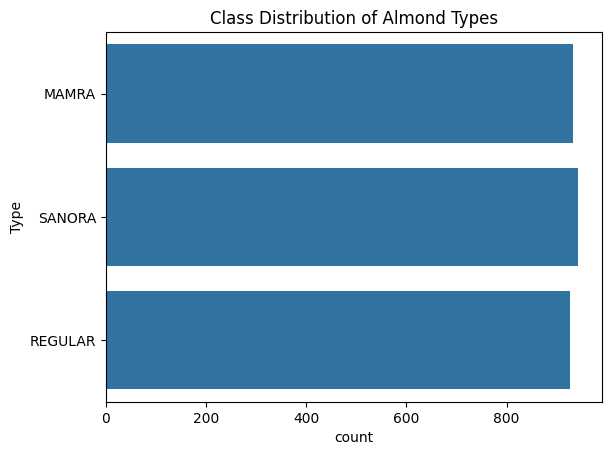

In [160]:
# EDA: distribution of classes
sns.countplot(df['Type'])
plt.title('Class Distribution of Almond Types')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

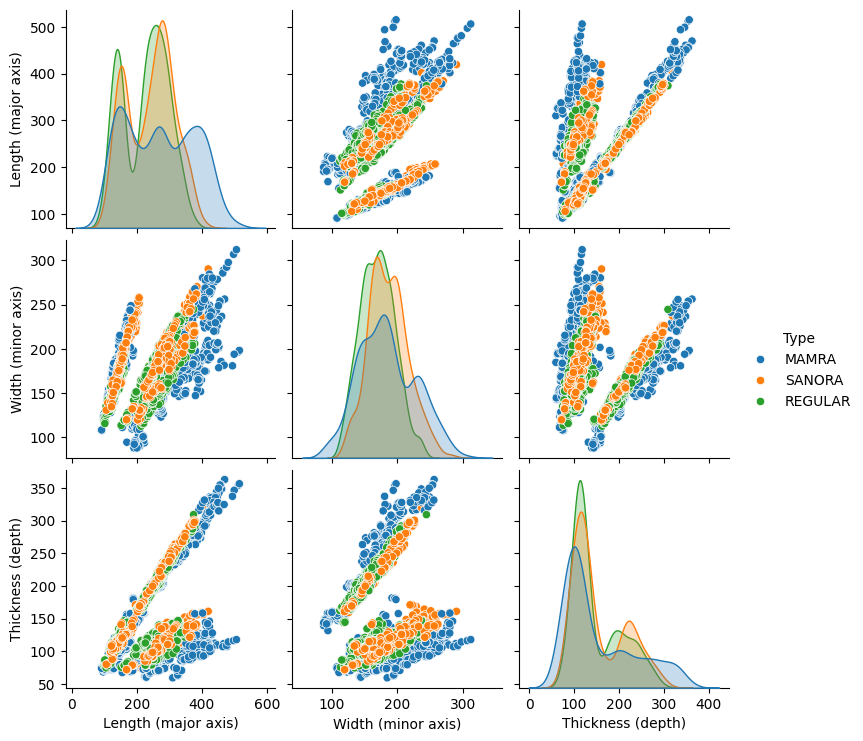

In [210]:
# EDA: pairplot for the geometric features
sns.pairplot(df, hue='Type', vars=['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)'])
plt.show()

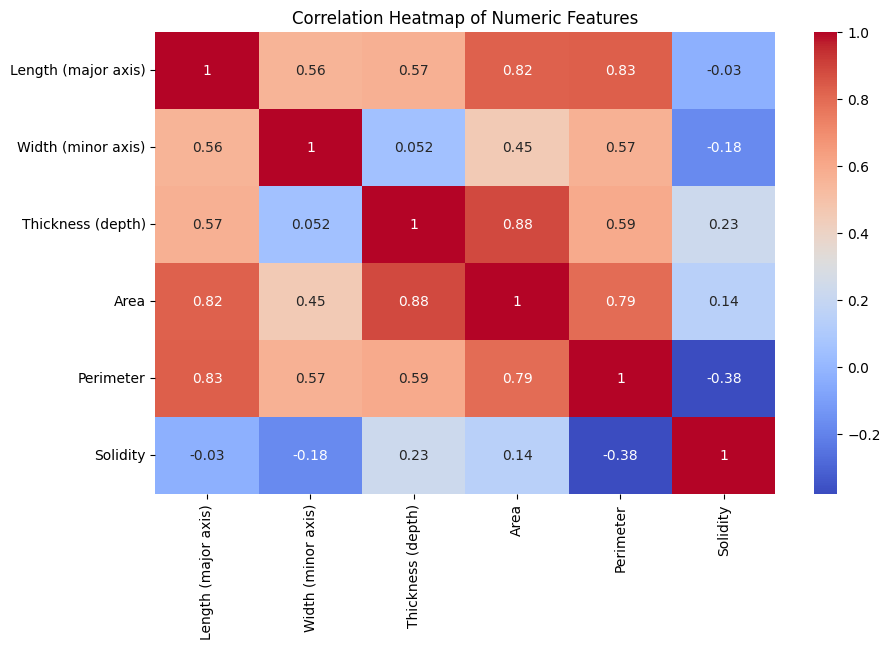

In [211]:
# EDA: correlation heatmap
df_numeric = df.drop(columns=['Type'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [212]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import random

# One-hot encode
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

print("First 10 rows of X_train:")
print(X_train[:10])

print("First 10 rows of one-hot encoded y_train:")
print(y_train[:10])

print("First 10 rows of X_test:")
print(X_test[:10])

print("First 10 rows of one-hot encoded y_test:")
print(y_test[:10])

Training set size: (2242, 6)
Validation set size: (280, 6)
Test set size: (281, 6)
First 10 rows of X_train:
[[ 1.68772356 -0.54169231  1.89473124  1.19544702  1.08710875  0.25469908]
 [ 0.18511946 -0.15108886 -0.98453126 -0.82997331  0.20819715 -3.7805559 ]
 [-0.12973374 -1.56868482  0.4193576  -0.24467288 -0.00932823  0.1817248 ]
 [ 1.10764047  0.7950324   1.86707398  2.07232729  1.29319604  0.44444412]
 [ 2.17357083  1.6772741   2.8069123   3.72314954  2.55496863  0.18231564]
 [ 1.29471544  1.47014361 -0.72522996  0.03903328  0.37658377 -0.39400931]
 [-0.42301013 -0.81459632 -0.88695083 -0.81992259 -0.82237074  0.23515842]
 [ 0.28499253 -1.30861771  0.76287192  0.05761079 -0.24281798  0.71339327]
 [-1.51555312 -0.89475421 -1.10794691 -1.25315594 -1.47174629  0.39880684]
 [-0.55862539 -1.81818861  0.06928853 -0.68120809 -0.87484681  0.56881195]]
First 10 rows of one-hot encoded y_train:
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [

In [164]:
df.head(10)

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Solidity,Type
0,177.849880,227.940628,127.759132,22619.0,643.813269,0.973384,MAMRA
1,181.193817,234.188126,128.199509,23038.0,680.984841,0.957304,MAMRA
2,177.607578,229.418610,125.796547,22386.5,646.943212,0.967270,MAMRA
3,179.340981,232.763153,125.918808,22578.5,661.227483,0.965512,MAMRA
4,168.702095,230.150742,107.253448,19068.0,624.842706,0.951450,MAMRA
5,169.837109,231.914429,107.759789,19335.0,615.386863,0.957344,MAMRA
6,166.425228,226.371048,106.479408,18583.5,613.972649,0.956286,MAMRA
7,164.404610,226.186142,102.623077,18069.5,584.859952,0.968978,MAMRA
8,413.477173,275.833855,138.190536,41492.0,1078.984843,0.950986,MAMRA
9,418.210327,273.935112,129.659897,40630.5,1039.428493,0.955888,MAMRA


In [213]:
def create_model(optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
    model.add(Dense(32, activation='relu'))  # Hidden layer
    model.add(Dense(16, activation='relu'))  # Hidden layer
    model.add(Dense(3, activation='softmax'))  # Output layer (3 almond types)

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = optimizer

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [214]:
# Check for NaN values in X_train
print("Number of NaN values in X_train:", np.isnan(X_train).sum())
print("Number of NaN values in y_train:", np.isnan(y_train).sum())

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


Number of NaN values in X_train: 0
Number of NaN values in y_train: 0
X_train shape: (2242, 6)
y_train shape: (2242, 3)


In [215]:
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

def create_model(learning_rate=0.001):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'batch_size': [16, 32, 64],
    'optimizer__learning_rate': [0.001, 0.01, 0.1],
    'epochs': [5,50,100]
}


kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, verbose=1)
grid_result = grid.fit(X_train, y_train)

print(f"Best score: {grid_result.best_score_} using {grid_result.best_params_}")



Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Best score: 0.7448695554648778 using {'batch_size': 16, 'epochs': 100, 'optimizer__learning_rate': 0.01}


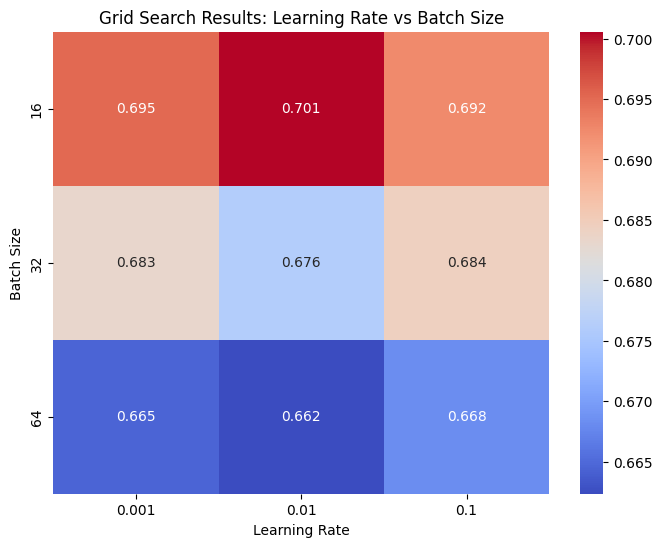

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.DataFrame(grid_result.cv_results_)
scores_matrix = results_df.pivot_table(index='param_batch_size', columns='param_optimizer__learning_rate', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, cmap="coolwarm", fmt=".3f")
plt.title('Grid Search Results: Learning Rate vs Batch Size')
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.show()

best_params = grid_result.best_params_

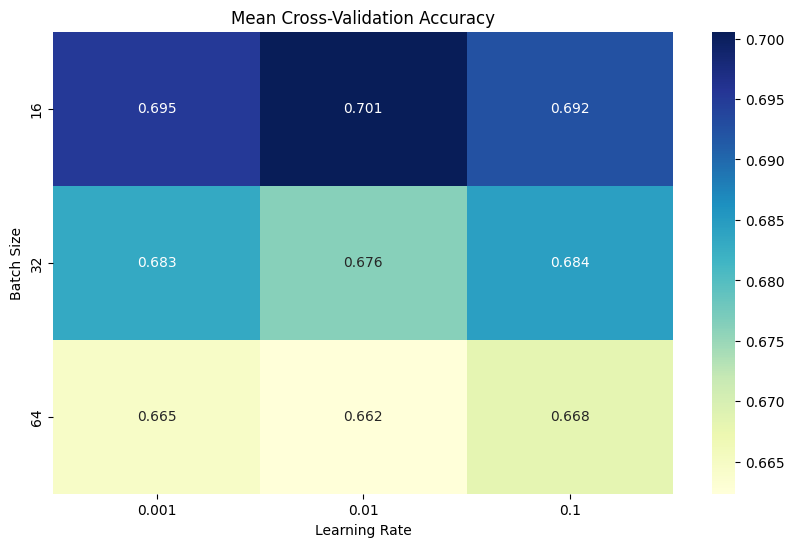

In [217]:
mean_scores = results_df.pivot_table(index='param_batch_size', columns='param_optimizer__learning_rate', values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(mean_scores, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title('Mean Cross-Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.show()

Text(95.72222222222221, 0.5, 'Batch Size')

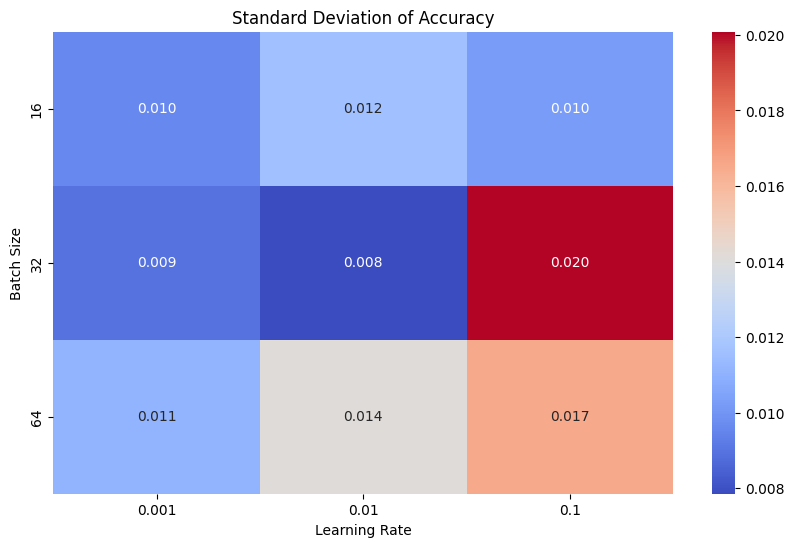

In [218]:
std_scores = results_df.pivot_table(index='param_batch_size', columns='param_optimizer__learning_rate', values='std_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(std_scores, annot=True, cmap="coolwarm", fmt=".3f")
plt.title('Standard Deviation of Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')

In [219]:
from scipy.stats import ttest_ind

lr_0001 = results_df[results_df['param_optimizer__learning_rate'] == 0.001]['mean_test_score']
lr_001 = results_df[results_df['param_optimizer__learning_rate'] == 0.01]['mean_test_score']

t_stat, p_value = ttest_ind(lr_0001, lr_001)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between the two learning rates.")
else:
    print("No significant difference between the two learning rates.")


T-statistic: 0.037573624431005294
P-value: 0.9704924510125181
No significant difference between the two learning rates.


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.7615658362989324
Test Loss: 0.7615658362989324


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.8256227758007118
Test Loss: 0.8256227758007118


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.800711743772242
Test Loss: 0.800711743772242
Mean Validation Accuracy: [0.56975842 0.65002004 0.64466977 0.66251302 0.65216482 0.66286953
 0.66071866 0.68640695 0.68711921 0.68141435 0.68497904 0.68284267
 0.6796299  0.68712342 0.69746858 0.68355644 0.67571483 0.6828358
 0.68354956 0.68533325 0.66358942 0.6963983  0.69746361 0.69603797
 0.69711055 0.69888504 0.68748373 0.69925569 0.69925721 0.70139778
 0.70176228 0.70710798 0.70388951 0.70247034 0.69996448 0.70995585
 0.70531782 0.71352432 0.70852677 0.71423775 0.72030292 0.72030063
 0.70495522 0.71067574 0.71566987 0.72173274 0.72850639 0.72743764
 0.72137854 0.73243062 0.71423123 0.7178089  0.72208468 0.71423697
 0.73243368 0.71601874 0.73100462 0.72921902 0.71387245 0.72636276
 0.71566109 0.72101134 0.70388492 0.72458021 0.71816578 0.72315154
 0.71601721 0.71351745 0.73028775 0.72422487 0.72101287 0.71816655
 0.73135918 0.72387369 0.73349899 0.73706901 0.72636046 0.7367148
 0.73885002 0.7392115  0.73707094 0.7224400

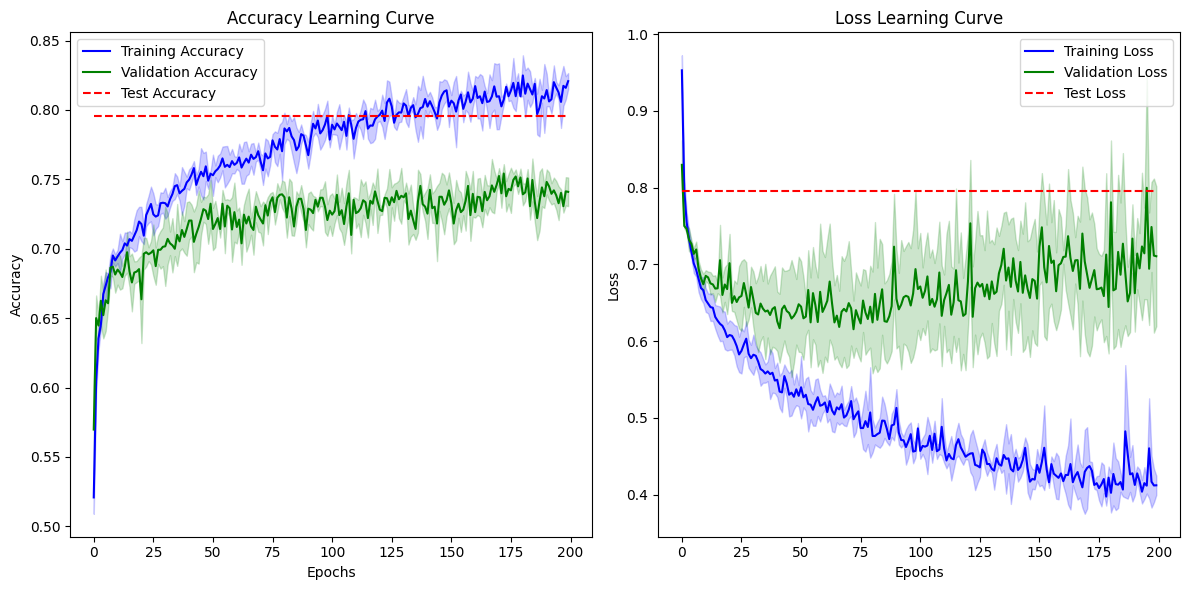

Epoch 1:
  Train Accuracy: 0.5046, Val Accuracy: 0.5972, Test Accuracy: 0.8221
  Train Loss: 0.9676, Val Loss: 0.8288, Test Loss: 0.8007
Epoch 2:
  Train Accuracy: 0.5874, Val Accuracy: 0.6083, Test Accuracy: 0.8221
  Train Loss: 0.8204, Val Loss: 0.7688, Test Loss: 0.8007
Epoch 3:
  Train Accuracy: 0.6249, Val Accuracy: 0.6368, Test Accuracy: 0.8221
  Train Loss: 0.7631, Val Loss: 0.7474, Test Loss: 0.8007
Epoch 4:
  Train Accuracy: 0.6484, Val Accuracy: 0.6497, Test Accuracy: 0.8221
  Train Loss: 0.7380, Val Loss: 0.7389, Test Loss: 0.8007
Epoch 5:
  Train Accuracy: 0.6655, Val Accuracy: 0.6657, Test Accuracy: 0.8221
  Train Loss: 0.7158, Val Loss: 0.7124, Test Loss: 0.8007
Epoch 6:
  Train Accuracy: 0.6707, Val Accuracy: 0.6639, Test Accuracy: 0.8221
  Train Loss: 0.7033, Val Loss: 0.7215, Test Loss: 0.8007
Epoch 7:
  Train Accuracy: 0.6800, Val Accuracy: 0.6753, Test Accuracy: 0.8221
  Train Loss: 0.6929, Val Loss: 0.7023, Test Loss: 0.8007
Epoch 8:
  Train Accuracy: 0.6852, Val Ac

In [232]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed)

def create_best_model(learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # 3 output classes

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

best_params = {
    'batch_size': 16,
    'epochs': 200,
    'learning_rate': 0.01 #0.0001
}

best_model = KerasClassifier(build_fn=create_best_model,
                             batch_size=best_params['batch_size'],
                             epochs=best_params['epochs'],
                             verbose=0)

kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

accuracies = []
train_accuracies_list = []
val_accuracies_list = []
test_accuracies_list = []
train_loss_list = []
val_loss_list = []
test_loss_list = []

for train_idx, val_idx in kfold.split(X_scaled):

    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y_onehot[train_idx], y_onehot[val_idx]

    history = best_model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold))

    train_accuracies_list.append(history.history_['accuracy'])
    val_accuracies_list.append(history.history_['val_accuracy'])
    train_loss_list.append(history.history_['loss'])
    val_loss_list.append(history.history_['val_loss'])

    y_pred_val = best_model.predict(X_val_fold)

    accuracy_val = accuracy_score(np.argmax(y_val_fold, axis=1), np.argmax(y_pred_val, axis=1))
    accuracies.append(accuracy_val)

    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1))

    test_loss = best_model.score(X_test, y_test)

    print(f"Test Accuracy: {test_accuracy}")
    print(f"Test Loss: {test_loss}")

    test_accuracies_list.append(test_accuracy)
    test_loss_list.append(test_loss)

# Calculate mean and standard deviation for accuracies and losses
mean_train_accuracy = np.mean(train_accuracies_list, axis=0)
std_train_accuracy = np.std(train_accuracies_list, axis=0)

mean_val_accuracy = np.mean(val_accuracies_list, axis=0)
std_val_accuracy = np.std(val_accuracies_list, axis=0)

mean_test_accuracy = np.mean(test_accuracies_list)
std_test_accuracy = np.std(test_accuracies_list)

mean_train_loss = np.mean(train_loss_list, axis=0)
std_train_loss = np.std(train_loss_list, axis=0)

mean_val_loss = np.mean(val_loss_list, axis=0)
std_val_loss = np.std(val_loss_list, axis=0)

mean_test_loss = np.mean(test_loss_list)
std_test_loss = np.std(test_loss_list)

# Print calculated metrics
print(f"Mean Validation Accuracy: {mean_val_accuracy}")
print(f"Standard Deviation of Validation Accuracy: {std_val_accuracy}")
print(f"Mean Test Accuracy: {mean_test_accuracy}")
print(f"Standard Deviation of Test Accuracy: {std_test_accuracy}")

# Plot learning curves
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(mean_train_accuracy, label='Training Accuracy', color='blue')
plt.plot(mean_val_accuracy, label='Validation Accuracy', color='green')
plt.plot([mean_test_accuracy] * len(mean_train_accuracy), label='Test Accuracy', color='red', linestyle='--')
plt.fill_between(range(len(mean_train_accuracy)),
                 mean_train_accuracy - std_train_accuracy,
                 mean_train_accuracy + std_train_accuracy, color='blue', alpha=0.2)
plt.fill_between(range(len(mean_val_accuracy)),
                 mean_val_accuracy - std_val_accuracy,
                 mean_val_accuracy + std_val_accuracy, color='green', alpha=0.2)
plt.title('Accuracy Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(mean_train_loss, label='Training Loss', color='blue')
plt.plot(mean_val_loss, label='Validation Loss', color='green')
plt.plot([mean_test_loss] * len(mean_train_loss), label='Test Loss', color='red', linestyle='--')
plt.fill_between(range(len(mean_train_loss)),
                 mean_train_loss - std_train_loss,
                 mean_train_loss + std_train_loss, color='blue', alpha=0.2)
plt.fill_between(range(len(mean_val_loss)),
                 mean_val_loss - std_val_loss,
                 mean_val_loss + std_val_loss, color='green', alpha=0.2)
plt.title('Loss Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

for epoch in range(best_params['epochs']):
    print(f"Epoch {epoch + 1}:")
    print(f"  Train Accuracy: {train_accuracies[epoch]:.4f}, Val Accuracy: {val_accuracies[epoch]:.4f}, Test Accuracy: {test_accuracies:.4f}")
    print(f"  Train Loss: {train_loss[epoch]:.4f}, Val Loss: {val_loss[epoch]:.4f}, Test Loss: {test_loss:.4f}")

from sklearn.metrics import classification_report, confusion_matrix

y_test_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1))
test_loss = best_model.score(X_test, y_test)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

print("Confusion Matrix:")
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1)))

print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1)))

train_accuracies = np.mean(train_accuracies_list, axis=0)
val_accuracies = np.mean(val_accuracies_list, axis=0)



In [ ]:
#2.3 hybrid learning

In [231]:
class RProp(Optimizer):
    def __init__(self, learning_rate=0.001, eta_plus=1.2, eta_minus=0.5, delta_min=1e-6, delta_max=50.0, name="RProp", **kwargs):
        super(RProp, self).__init__(name, **kwargs)
        self.learning_rate = learning_rate
        self.eta_plus = eta_plus
        self.eta_minus = eta_minus
        self.delta_min = delta_min
        self.delta_max = delta_max

    def apply_gradients(self, grads_and_vars, name=None):
        updates = []
        for grad, var in grads_and_vars:
            if grad is None:
                continue

            sign_grad = tf.sign(grad)
            var_update = self.learning_rate * sign_grad
            updates.append(var.assign_add(var_update))

        return tf.group(*updates)

    def get_config(self):
        config = super(RProp, self).get_config()
        config.update({
            "learning_rate": self.learning_rate,
            "eta_plus": self.eta_plus,
            "eta_minus": self.eta_minus,
            "delta_min": self.delta_min,
            "delta_max": self.delta_max
        })
        return config

In [222]:
def create_rprop_model(learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # 3 output classes

    optimizer = RProp(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.800711743772242
Test Loss: 0.800711743772242


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.800711743772242
Test Loss: 0.800711743772242


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.800711743772242
Test Loss: 0.800711743772242
Mean Validation Accuracy: [0.50482543 0.5611847  0.6229019  0.65108385 0.66142899 0.66677888
 0.67070695 0.67784049 0.67962456 0.6856905  0.68890136 0.68854447
 0.69139882 0.69211296 0.69211181 0.69461002 0.69318362 0.69567992
 0.69782126 0.69746437 0.69853314 0.69924768 0.7006737  0.70067485
 0.70495522 0.70673889 0.706382   0.70780651 0.708163   0.71066274
 0.71173189 0.71458624 0.71351633 0.71815548 0.71530153 0.71744323
 0.7163737  0.71886965 0.7188708  0.72065445 0.72243776 0.7217236
 0.722437   0.72243736 0.72243585 0.72493404 0.72314924 0.72636122
 0.72671735 0.72743036]
Standard Deviation of Validation Accuracy: [0.02075632 0.01705516 0.01461128 0.00976375 0.01194446 0.01398207
 0.00886467 0.00988036 0.01018937 0.00908512 0.00851957 0.00956613
 0.0075636  0.00738509 0.00938434 0.00774751 0.00593334 0.00805123
 0.0054053  0.00526917 0.00862989 0.00712155 0.00862885 0.00713374
 0.00887686 0.01041174 0.01150744 0.015920

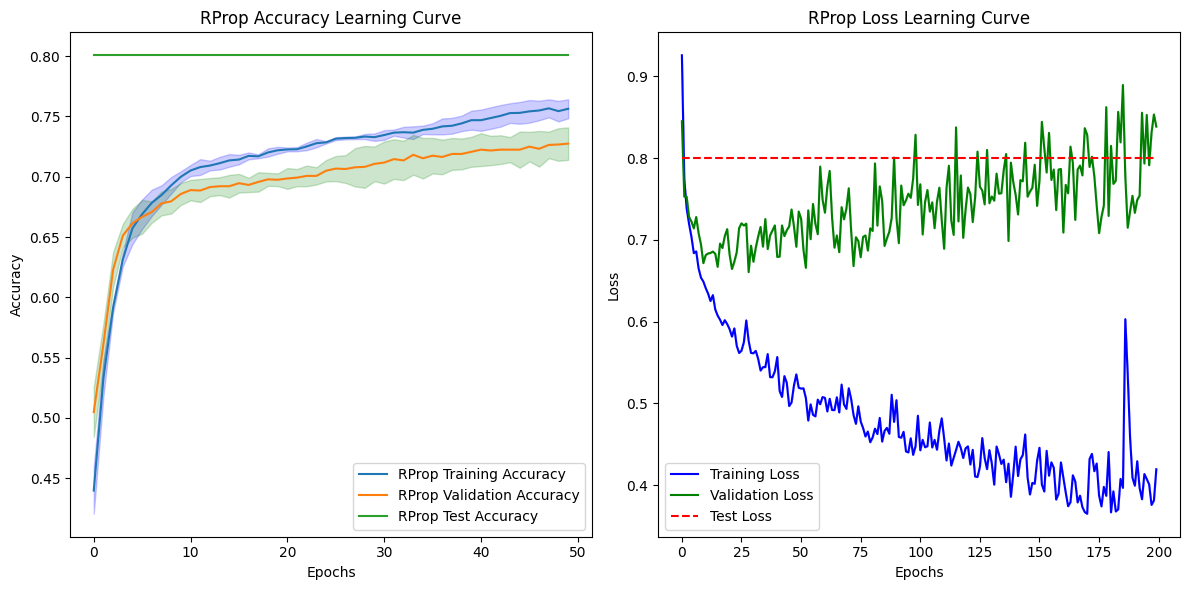

Epoch 1:
  Train Accuracy: 0.4397, Val Accuracy: 0.5048, Test Accuracy: 0.8007
  Train Loss: 0.9259, Val Loss: 0.8452, Test Loss: 0.8007
Epoch 2:
  Train Accuracy: 0.5330, Val Accuracy: 0.5612, Test Accuracy: 0.8007
  Train Loss: 0.7747, Val Loss: 0.7529, Test Loss: 0.8007
Epoch 3:
  Train Accuracy: 0.5915, Val Accuracy: 0.6229, Test Accuracy: 0.8007
  Train Loss: 0.7385, Val Loss: 0.7530, Test Loss: 0.8007
Epoch 4:
  Train Accuracy: 0.6313, Val Accuracy: 0.6511, Test Accuracy: 0.8007
  Train Loss: 0.7197, Val Loss: 0.7282, Test Loss: 0.8007
Epoch 5:
  Train Accuracy: 0.6573, Val Accuracy: 0.6614, Test Accuracy: 0.8007
  Train Loss: 0.7038, Val Loss: 0.7225, Test Loss: 0.8007
Epoch 6:
  Train Accuracy: 0.6689, Val Accuracy: 0.6668, Test Accuracy: 0.8007
  Train Loss: 0.6839, Val Loss: 0.7141, Test Loss: 0.8007
Epoch 7:
  Train Accuracy: 0.6784, Val Accuracy: 0.6707, Test Accuracy: 0.8007
  Train Loss: 0.6860, Val Loss: 0.7280, Test Loss: 0.8007
Epoch 8:
  Train Accuracy: 0.6848, Val Ac

In [235]:
rprop_params = {
    'batch_size': 16,
    'epochs': 50,
    'learning_rate': 0.01
}

rprop_model = KerasClassifier(build_fn=create_model,
                             batch_size=rprop_params['batch_size'],
                             epochs=rprop_params['epochs'],
                             verbose=0,
                             optimizer='rprop')

rprop_accuracies = []

rprop_train_acc_list = []
rprop_val_acc_list = []
rprop_test_accuracies_list = []

rprop_train_loss_list = []
rprop_val_loss_list = []
rprop_test_loss_list = []

for train_idx, val_idx in kfold.split(X_scaled):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y_onehot[train_idx], y_onehot[val_idx]

    rprop_history = rprop_model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold))

    rprop_train_acc_list.append(rprop_history.history_['accuracy'])
    rprop_val_acc_list.append(rprop_history.history_['val_accuracy'])

    rprop_train_loss_list.append(history.history_['loss'])
    rprop_val_loss_list.append(history.history_['val_loss'])

    y_pred = rprop_model.predict(X_val_fold)
    accuracy = accuracy_score(np.argmax(y_val_fold, axis=1), np.argmax(y_pred, axis=1))
    rprop_accuracies.append(accuracy)

    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1))

    test_loss = best_model.score(X_test, y_test)

    print(f"Test Accuracy: {test_accuracy}")
    print(f"Test Loss: {test_loss}")

    rprop_test_accuracies_list.append(test_accuracy)
    rprop_test_loss_list.append(test_loss)

rprop_train_acc = np.mean(rprop_train_acc_list, axis=0)
rprop_val_acc = np.mean(rprop_val_acc_list, axis=0)
rprop_test_acc = np.mean(rprop_test_accuracies_list)
rprop_train_loss = np.mean(rprop_train_loss_list, axis=0)
rprop_val_loss = np.mean(rprop_val_loss_list, axis=0)
rprop_test_loss = np.mean(rprop_test_loss_list)

rprop_std_train_acc = np.std(rprop_train_acc_list, axis=0)
rprop_std_val_acc = np.std(rprop_val_acc_list, axis=0)
rprop_std_test_acc = np.std(rprop_test_accuracies_list)
rprop_std_train_loss = np.std(rprop_train_loss_list, axis=0)
rprop_std_val_loss = np.std(rprop_val_loss_list, axis=0)
rprop_std_test_loss = np.std(rprop_test_loss_list)

# Print calculated metrics
print(f"Mean Validation Accuracy: {rprop_val_acc}")
print(f"Standard Deviation of Validation Accuracy: {rprop_std_val_acc}")
print(f"Mean Test Accuracy: {rprop_test_acc}")
print(f"Standard Deviation of Test Accuracy: {rprop_std_test_acc}")


# Plot RProp learning curves
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(rprop_train_acc, label='RProp Training Accuracy')
plt.plot(rprop_val_acc, label='RProp Validation Accuracy')
plt.plot([rprop_test_acc] * len(rprop_train_acc), label='RProp Test Accuracy')
plt.fill_between(range(len(rprop_train_acc)),
                 rprop_train_acc - rprop_std_train_acc,
                 rprop_train_acc + rprop_std_train_acc, color='blue', alpha=0.2)
plt.fill_between(range(len(rprop_val_acc)),
                 rprop_val_acc - rprop_std_val_acc,
                 rprop_val_acc + rprop_std_val_acc, color='green', alpha=0.2)
plt.title('RProp Accuracy Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(rprop_train_loss, label='Training Loss', color='blue')
plt.plot(rprop_val_loss, label='Validation Loss', color='green')
plt.plot([rprop_test_loss] * len(rprop_train_loss), label='Test Loss', color='red', linestyle='--')
plt.fill_between(range(len(rprop_train_loss)),
                 rprop_train_loss - rprop_std_train_loss,
                 rprop_train_loss + rprop_std_train_loss, color='blue', alpha=0.2)
plt.fill_between(range(len(rprop_val_loss)),
                 rprop_val_loss - rprop_std_val_loss,
                 rprop_val_loss + rprop_std_val_loss, color='green', alpha=0.2)
plt.title('RProp Loss Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

for epoch in range(rprop_params['epochs']):
    print(f"Epoch {epoch + 1}:")
    print(f"  Train Accuracy: {rprop_train_acc[epoch]:.4f}, Val Accuracy: {rprop_val_acc[epoch]:.4f}, Test Accuracy: {rprop_test_acc:.4f}")
    print(f"  Train Loss: {rprop_train_loss[epoch]:.4f}, Val Loss: {rprop_val_loss[epoch]:.4f}, Test Loss: {rprop_test_loss:.4f}")

print("Test accuracy: ")
print(test_accuracy)

from sklearn.metrics import classification_report, confusion_matrix

y_test_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1))
test_loss = best_model.score(X_test, y_test)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

print("Confusion Matrix:")
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1)))

print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1)))

train_accuracies = np.mean(train_accuracies_list, axis=0)
val_accuracies = np.mean(val_accuracies_list, axis=0)

In [224]:
from tensorflow.keras.optimizers import Adam, RMSprop

def create_model(optimizer=None, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # 3 output classes for classification

    if optimizer is None:
        optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [225]:
def hybrid_update(create_model_func, X_train, y_train, X_val, y_val):

    model_adam = create_model_func(optimizer=Adam(learning_rate=0.001))
    model_rprop = create_model_func(optimizer=RMSprop(learning_rate=0.001))

    epochs = 10

    for epoch in range(epochs):
        model_adam.fit(X_train, y_train, epochs=1, batch_size=16, verbose=0, validation_data=(X_val, y_val))
        model_rprop.fit(X_train, y_train, epochs=1, batch_size=16, verbose=0, validation_data=(X_val, y_val))

        adam_weights = model_adam.get_weights()
        rprop_weights = model_rprop.get_weights()

        hybrid_weights = [(adam_w + rprop_w) / 2 for adam_w, rprop_w in zip(adam_weights, rprop_weights)]

        model_adam.set_weights(hybrid_weights)

    return model_adam


In [228]:
import matplotlib.pyplot as plt

def train_model_with_history(optimizer, X_train, y_train, X_val, y_val, epochs=10, batch_size=16):
    model = create_model(optimizer=optimizer)

    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=0)

    return history

def train_hybrid_with_history(X_train, y_train, X_val, y_val, epochs=10):
    model_adam = create_model(optimizer=Adam(learning_rate=0.001))
    model_rprop = create_model(optimizer=RMSprop(learning_rate=0.001))

    train_loss = []
    val_loss = []

    for epoch in range(epochs):
        history_adam = model_adam.fit(X_train, y_train, epochs=1, batch_size=16, verbose=0, validation_data=(X_val, y_val))
        history_rprop = model_rprop.fit(X_train, y_train, epochs=1, batch_size=16, verbose=0, validation_data=(X_val, y_val))

        adam_weights = model_adam.get_weights()
        rprop_weights = model_rprop.get_weights()
        hybrid_weights = [(adam_w + rprop_w) / 2 for adam_w, rprop_w in zip(adam_weights, rprop_weights)]
        model_adam.set_weights(hybrid_weights)

        train_loss.append(history_adam.history['loss'][0])
        val_loss.append(history_adam.history['val_loss'][0])

    return {'loss': train_loss, 'val_loss': val_loss}

adam_losses = {'loss': [], 'val_loss': []}
rmsprop_losses = {'loss': [], 'val_loss': []}
hybrid_losses = {'loss': [], 'val_loss': []}

epochs = 100

adam_history = train_model_with_history(Adam(learning_rate=0.001), X_train, y_train, X_val, y_val, epochs=epochs)
adam_losses['loss'] = adam_history.history['loss']
adam_losses['val_loss'] = adam_history.history['val_loss']

rmsprop_history = train_model_with_history(RMSprop(learning_rate=0.001), X_train, y_train, X_val, y_val, epochs=epochs)
rmsprop_losses['loss'] = rmsprop_history.history['loss']
rmsprop_losses['val_loss'] = rmsprop_history.history['val_loss']

hybrid_history = train_hybrid_with_history(X_train, y_train, X_val, y_val, epochs=epochs)

hybrid_losses = train_hybrid_with_history(X_train, y_train, X_val, y_val, epochs=epochs)



In [238]:
import matplotlib.pyplot as plt

def train_model_with_history(optimizer, X_train, y_train, X_val, y_val, epochs=10, batch_size=16):
    model = create_model(optimizer=optimizer)

    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=0)

    return history

def train_hybrid_with_history(X_train, y_train, X_val, y_val, epochs=10):
    model_adam = create_model(optimizer=Adam(learning_rate=0.001))
    model_rprop = create_model(optimizer=RMSprop(learning_rate=0.001))

    train_loss = []
    val_loss = []

    for epoch in range(epochs):
        history_adam = model_adam.fit(X_train, y_train, epochs=1, batch_size=16, verbose=0, validation_data=(X_val, y_val))
        history_rprop = model_rprop.fit(X_train, y_train, epochs=1, batch_size=16, verbose=0, validation_data=(X_val, y_val))

        adam_weights = model_adam.get_weights()
        rprop_weights = model_rprop.get_weights()
        hybrid_weights = [(adam_w + rprop_w) / 2 for adam_w, rprop_w in zip(adam_weights, rprop_weights)]
        model_adam.set_weights(hybrid_weights)

        train_loss.append(history_adam.history['loss'][0])
        val_loss.append(history_adam.history['val_loss'][0])

    return {'loss': train_loss, 'val_loss': val_loss}

adam_losses = {'loss': [], 'val_loss': []}
rmsprop_losses = {'loss': [], 'val_loss': []}
hybrid_losses = {'loss': [], 'val_loss': []}

epochs = 100

adam_history = train_model_with_history(Adam(learning_rate=0.001), X_train, y_train, X_val, y_val, epochs=epochs)
adam_losses['loss'] = adam_history.history['loss']
adam_losses['val_loss'] = adam_history.history['val_loss']

rmsprop_history = train_model_with_history(RMSprop(learning_rate=0.001), X_train, y_train, X_val, y_val, epochs=epochs)
rmsprop_losses['loss'] = rmsprop_history.history['loss']
rmsprop_losses['val_loss'] = rmsprop_history.history['val_loss']

hybrid_history = train_hybrid_with_history(X_train, y_train, X_val, y_val, epochs=epochs)

hybrid_model = create_model(optimizer=Adam(learning_rate=0.001))
hybrid_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

y_pred = np.argmax(hybrid_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

test_accuracy = accuracy_score(y_true, y_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

mean_accuracy = np.mean(hybrid_history['val_loss'])
std_accuracy = np.std(hybrid_history['val_loss'])
print(f'Mean Validation Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation of Validation Accuracy: {std_accuracy:.4f}')

conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
hybrid_losses = train_hybrid_with_history(X_train, y_train, X_val, y_val, epochs=epochs)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Test Accuracy: 0.7367
Mean Validation Accuracy: 0.6802
Standard Deviation of Validation Accuracy: 0.0558
Confusion Matrix:
[[73 12 11]
 [ 1 66 22]
 [ 4 24 68]]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


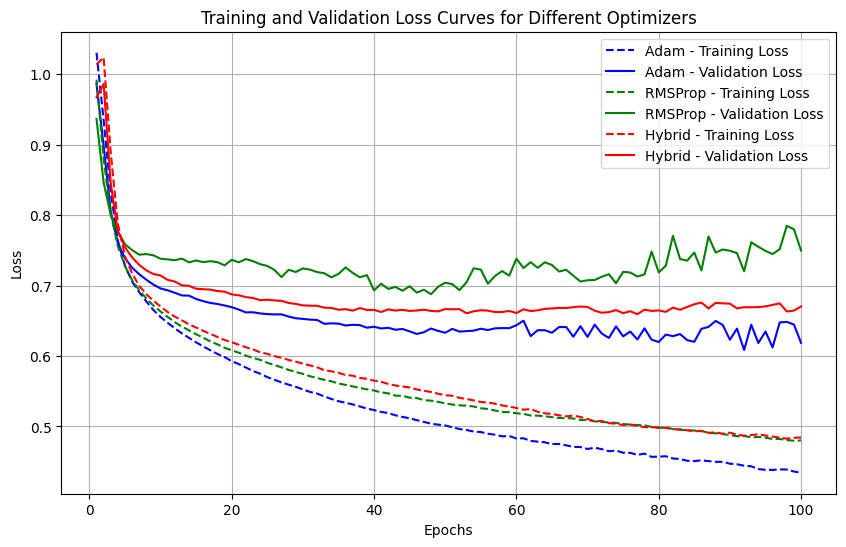

In [230]:
def plot_loss_curves(adam_losses, rmsprop_losses, hybrid_losses, epochs):
    plt.figure(figsize=(10, 6))

    plt.plot(range(1, epochs + 1), adam_losses['loss'], label='Adam - Training Loss', color='blue', linestyle='--')
    plt.plot(range(1, epochs + 1), adam_losses['val_loss'], label='Adam - Validation Loss', color='blue')

    plt.plot(range(1, epochs + 1), rmsprop_losses['loss'], label='RMSProp - Training Loss', color='green', linestyle='--')
    plt.plot(range(1, epochs + 1), rmsprop_losses['val_loss'], label='RMSProp - Validation Loss', color='green')

    plt.plot(range(1, epochs + 1), hybrid_losses['loss'], label='Hybrid - Training Loss', color='red', linestyle='--')
    plt.plot(range(1, epochs + 1), hybrid_losses['val_loss'], label='Hybrid - Validation Loss', color='red')

    plt.title('Training and Validation Loss Curves for Different Optimizers')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

plot_loss_curves(adam_losses, rmsprop_losses, hybrid_losses, epochs)
